In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import numpy.linalg as la

from matplotlib.animation import FuncAnimation

In [2]:
N = 200
n = 150
p = 0.2
period = 200

###  Create the graphs
tensor = np.zeros((N, n, n))
qs = np.zeros(N)
rs = np.zeros(N)
for i in range(N):
    if i % period < period // 4 or i % period > (3 * period) // 4:
        q = p*(np.cos(2*i*(2*np.pi/period))+1)/2
        r = p
    else:
        q = 0
        r = p*(np.cos(2*(i-period//4)*(2*np.pi/period))+1)/2
    P = np.array(
        [[p,q,q],
        [q,p,r],
        [q,r,p]])
    Gsbm = nx.to_numpy_matrix(nx.stochastic_block_model([n//3,n//3,n//3],P))
    tensor[i] = Gsbm
    qs[i] = q
    rs[i] = r

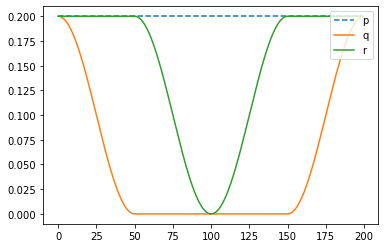

In [3]:
plt.plot(range(N), np.repeat(p, N), "--")
plt.plot(range(N), qs)
plt.plot(range(N), rs)
plt.legend(["p", "q", "r"], loc="upper right")

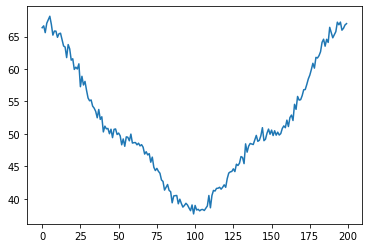

In [4]:
norm = np.array([la.norm(adj) for adj in tensor])
plt.plot(np.arange(len(tensor)), norm)

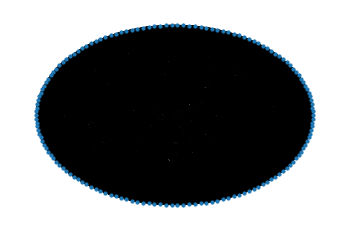

In [5]:
fig, ax = plt.subplots()
def animate(i):
    ax.clear()
    nx.draw_circular(nx.from_numpy_matrix(tensor[i]), node_size=10) #, with_labels=True, node_color=color_map
ani = FuncAnimation(fig, animate, frames = len(tensor), interval=100)
#ani.save("graph.gif")

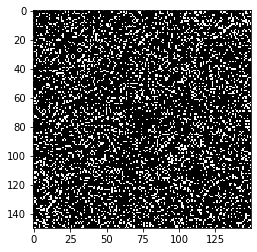

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [7]:
def animate_tensor(tensor, N, save_path):
    global im
    global display_tensor
    display_tensor = tensor
    fig = plt.figure()
    im = plt.imshow(display_tensor[0], cmap=plt.get_cmap("gray"), animated = True)
    ani = FuncAnimation(fig, animate, interval = 100, frames = N, blit=True)
    plt.show()
    ani.save(save_path)

def animate(i):
    global im
    im.set_array(display_tensor[i])
    return im,

animate_tensor(tensor, 200, "adj_mat.gif")

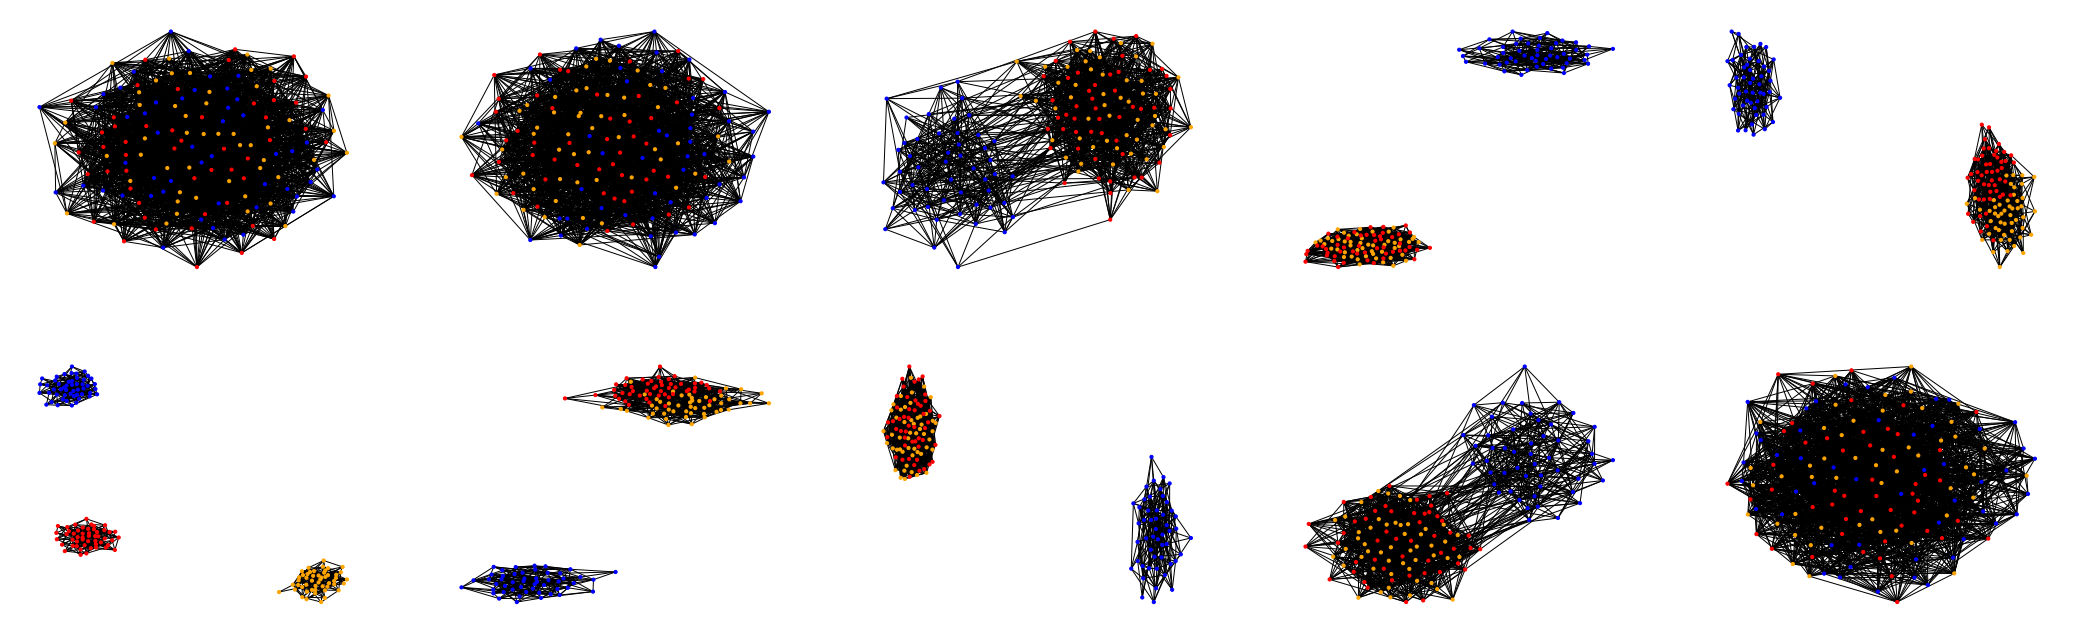

In [99]:
color_map = np.append(np.repeat("blue", n//3), np.repeat("orange", n//3))
color_map = np.append(color_map, np.repeat("red", n//3))

num_plots = 10
fig = plt.figure(figsize=(30,10))
for i in range(num_plots):
    plt.subplot(2,5,i+1)
    curr_slice = i*(period // num_plots)
    nx.draw(nx.from_numpy_matrix(tensor[curr_slice]),node_size = 10, node_color=color_map)
fig.tight_layout(pad=5.0)
plt.savefig("clump.png")

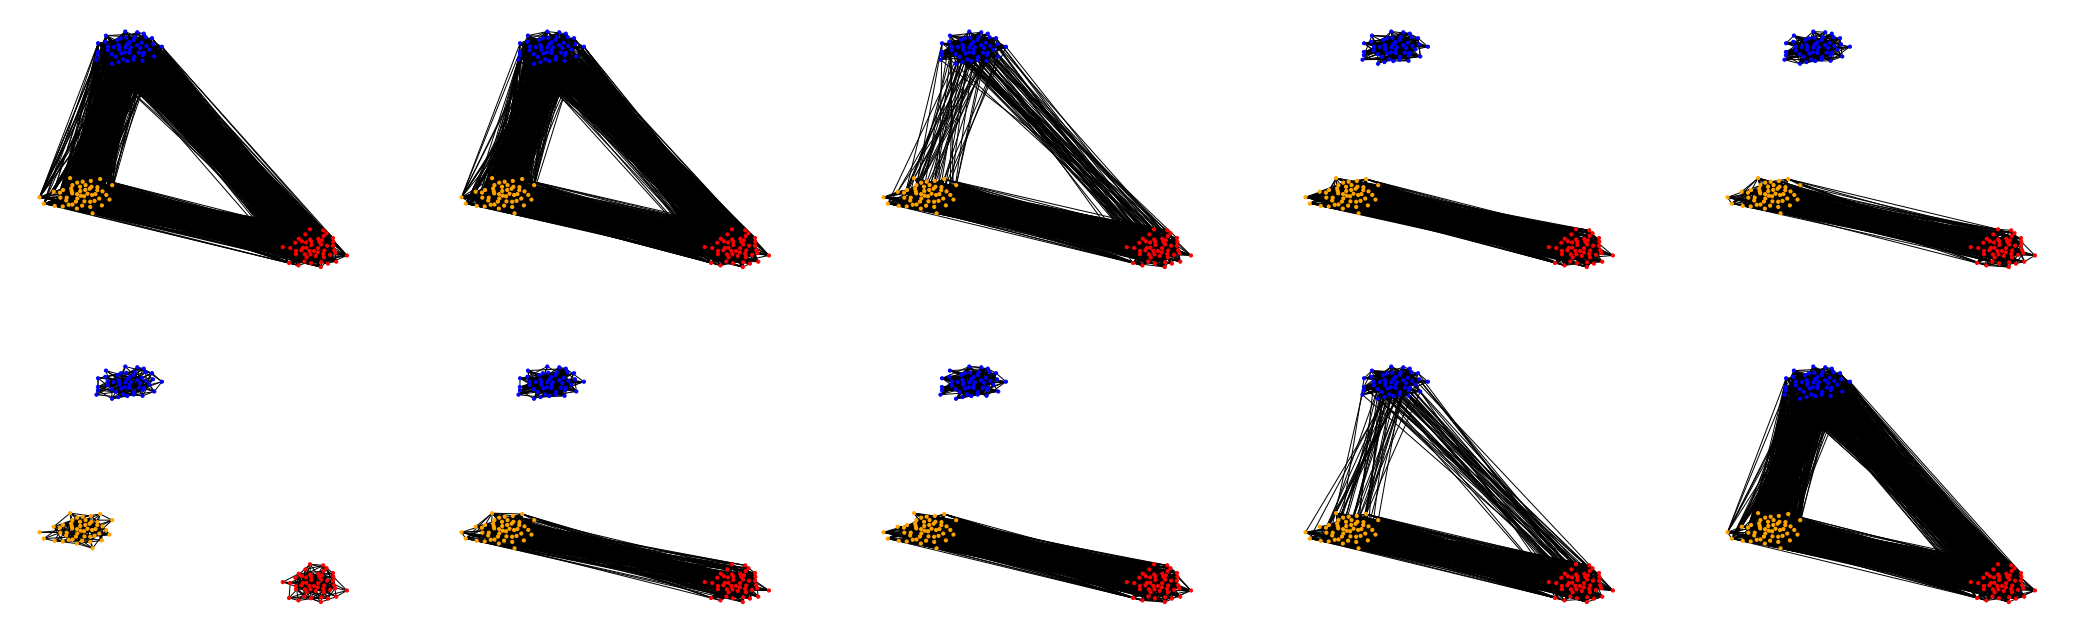

In [100]:
pos = nx.spring_layout(nx.from_numpy_matrix(tensor[100]))
fig = plt.figure(figsize=(30,10))
for i in range(num_plots):
    plt.subplot(2,5,i+1)
    curr_slice = i*(period // num_plots)
    nx.draw(nx.from_numpy_matrix(tensor[curr_slice]),node_size = 10, node_color=color_map, pos=pos)
fig.tight_layout(pad=5.0)
plt.savefig("triangle.png")